In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-insurance-cost-prediction/insurance.csv


In [47]:
df = pd.read_csv("/kaggle/input/health-insurance-cost-prediction/insurance.csv")

In [48]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [49]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [50]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [34]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [35]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [36]:
df.sex.unique()

array(['female', 'male'], dtype=object)

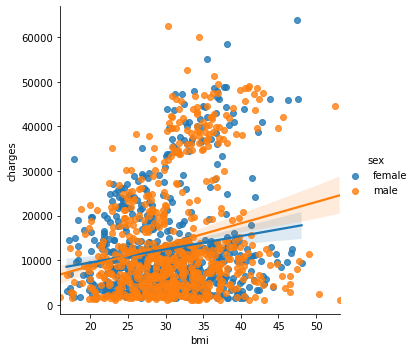

In [37]:
import seaborn as sns
sns.lmplot(x="bmi",y="charges",hue="sex",data=df)

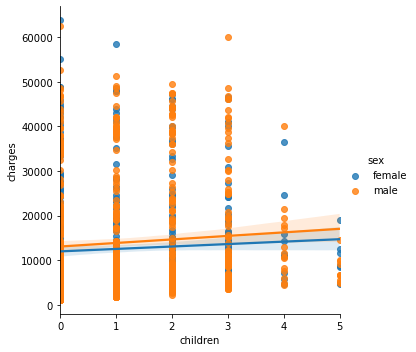

In [39]:
sns.lmplot(x="children",y="charges",hue="sex",data=df)

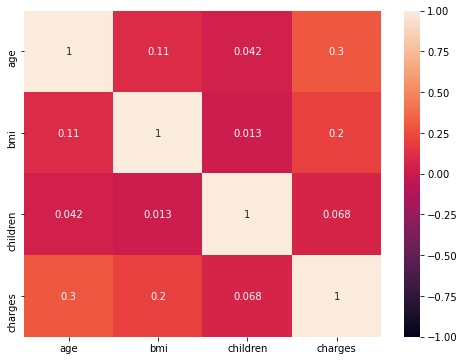

In [51]:
plt.figure(figsize=(8,6))
ax=sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)

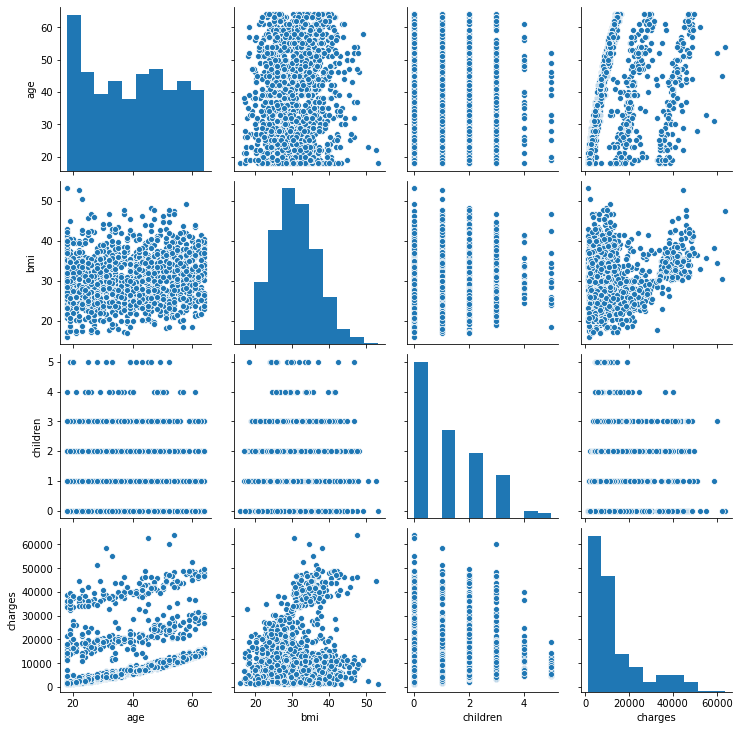

In [52]:
sns.pairplot(df) #lets check any linear connection btw features and target values

In [53]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# OLS Model

In [55]:
import statsmodels.formula.api as smf
# Sadece nümerik değişkenlerle model açıklanamıyor.
model=smf.ols('charges~ age + bmi + children',data=df)
model.fit().summary() #underfitting ! UPS!

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           8.80e-37
Time:                        13:57:06   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6916.2433   1757.480     -3.935      0.000   -1.04e+04   -3468.518
age          239.9945     22.289     10.767      0.000     196.269     283.720
bmi          332.0834     51.310      6.472      0.000     231.425     432.741
children     542.8647    258.241      2.102      0.036      36.261    1049.468
==============================================================================
Omnibus:                      325.395   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              603.372
Skew:                           1.520   Prob(JB):                    9.54e-132
Kurtosis:                       4.255   Cond. No.                         290.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

df = pd.concat([df, pd.get_dummies(df["sex"],prefix="sex")], axis=1)
df = pd.concat([df, pd.get_dummies(df["region"],prefix="region")], axis=1)
df = pd.concat([df, pd.get_dummies(df["smoker"],prefix="smoker")], axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,0,0,1,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0,0,1,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0,0,1,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0,1,0,0,1,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0,1,0,0,1,0


In [57]:
df.drop([ "region", "smoker", "sex"], axis = 1, inplace = True)

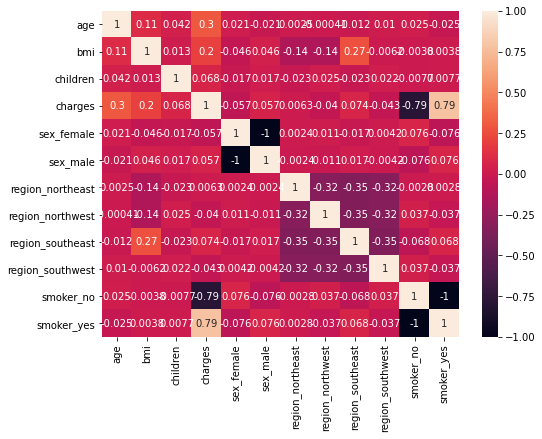

In [59]:
plt.figure(figsize=(8,6))
ax=sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)

In [60]:
df.drop(columns=["smoker_yes","sex_female"],inplace=True) # Avoid from multicol.

In [61]:
model=smf.ols('charges~ age + bmi + children + sex_male + region_northeast + region_northwest + region_southeast + region_southwest + smoker_no',data=df)
model.fit().summary() # More data reduces bias.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Fri, 10 Jul 2020   Prob (F-statistic):               0.00
Time:                        14:05:36   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         9058.3894    819.208     11.057      0.000    7451.308    1.07e+04
age                256.8564     11.899     21.587      0.000     233.514     280.199
bmi                339.1935     28.599     11.860      0.000     283.088     395.298
children           475.5005    137.804      3.451      0.001     205.163     745.838
sex_male          -131.3144    332.945     -0.394      0.693    -784.470     521.842
region_northeast  2851.6066    338.753      8.418      0.000    2187.057    3516.156
region_northwest  2498.6427    341.674      7.313      0.000    1828.363    3168.923
region_southeast  1816.5845    385.329      4.714      0.000    1060.666    2572.503
region_southwest  1891.5556    358.552      5.276      0.000    1188.166    2594.946
smoker_no        -2.385e+04    413.153    -57.723      0.000   -2.47e+04    -2.3e+04
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                     2.29e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.73e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge,Lasso,RidgeCV,LassoCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

X, y = df.drop('charges',axis=1), df['charges']

#Simple Validation
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3) # 60-20-20

# **Simple Linear Regression**

In [46]:
lreg = LinearRegression()
lreg.fit(X_train,y_train)

pred = lreg.predict(X_val)

#mean square error
mse = np.mean((pred - y_val)**2)

#r2

lreg.score(X_val, y_val)

0.7226475878381329

In [62]:
mse

39623600.74370786

In [81]:
coefs=pd.DataFrame(X_train.columns)
coefs["Coefficient Estimate"]=pd.Series(lreg.coef_)
coefs

,0,Coefficient Estimate
0,age,256.583487
1,bmi,350.480337
2,children,494.601709
3,sex_female,16.878697
4,sex_male,-16.878697
5,region_northeast,487.952277
6,region_northwest,336.302942
7,region_southeast,-589.724364
8,region_southwest,-234.530856
9,smoker_no,-12235.735615


# Ridge Regression

In [64]:
#Standardizasyon
reg=Ridge(alpha=0.05)

scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train.values)
X_val_scaled=scaler.transform(X_val.values)
X_test_scaled=scaler.transform(X_test.values)

reg.fit(X_train_scaled,y_train)

pred = reg.predict(X_val_scaled)

#mean square error
mse = np.mean((pred - y_val)**2)

#r2

reg.score(X_val_scaled, y_val) #Ridge has better r-score and mse than linear reg.Lets check polynomial

0.7226493193545226

In [65]:
mse

39623353.37281405

In [82]:
coefs=pd.DataFrame(X_train.columns)
coefs["Coefficient Estimate"]=pd.Series(reg.coef_)
coefs

,0,Coefficient Estimate
0,age,3607.390388
1,bmi,2177.348506
2,children,597.551077
3,sex_female,8.426089
4,sex_male,-8.426089
5,region_northeast,215.274566
6,region_northwest,148.528719
7,region_southeast,-257.220705
8,region_southwest,-95.170960
9,smoker_no,-4945.991108


# Degree 2 Polynomial Regression

In [72]:
poly=PolynomialFeatures(degree=2)
lm_poly=LinearRegression()

X_train_poly=poly.fit_transform(X_train.values)
X_val_poly=poly.transform(X_val.values)
X_test_poly=poly.transform(X_test.values)

lm_poly.fit(X_train_poly,y_train)

pred = lm_poly.predict(X_val_poly)

#mean square error
mse = np.mean((pred - y_val)**2)

#r2

lm_poly.score(X_val_poly, y_val)

0.8008754962714058

In [73]:
mse

28447669.780589633

In [83]:
coefs=pd.DataFrame(X_train.columns)
coefs["Coefficient Estimate"]=pd.Series(lm_poly.coef_)
coefs

,0,Coefficient Estimate
0,age,-5.079426e-11
1,bmi,-4.795380e+01
2,children,4.175003e+02
3,sex_female,1.308477e+02
4,sex_male,2.369774e+02
5,region_northeast,-2.369774e+02
6,region_northwest,-5.780734e+01
7,region_southeast,-4.735285e+02
8,region_southwest,6.894947e+02
9,smoker_no,-1.581589e+02


# Lasso Regression

In [75]:
lass=Ridge(alpha=0.05)


lass.fit(X_train_scaled,y_train)

pred = lass.predict(X_val_scaled)

#mean square error
mse = np.mean((pred - y_val)**2)

#r2

lass.score(X_val_scaled, y_val)

0.7226493193545226

In [84]:
coefs=pd.DataFrame(X_train.columns)
coefs["Coefficient Estimate"]=pd.Series(lass.coef_)
coefs

,0,Coefficient Estimate
0,age,3607.390388
1,bmi,2177.348506
2,children,597.551077
3,sex_female,8.426089
4,sex_male,-8.426089
5,region_northeast,215.274566
6,region_northwest,148.528719
7,region_southeast,-257.220705
8,region_southwest,-95.170960
9,smoker_no,-4945.991108


# RidgeCV

In [86]:
ridge_cv=RidgeCV(alphas=(0.0001,0.0005,0.001,0.01,0.005,0.05),normalize=True,cv=kf).fit(X_train,y_train)
ridge_cv_pred=ridge_cv.predict(X_val)

#mean square error
mse = np.mean((ridge_cv_pred - y_val)**2)

#r2

ridge_cv.score(X_val, y_val)

0.7229612803356029

In [87]:
lasso_cv=LassoCV(alphas=(0.0001,0.0005,0.001,0.01,0.005,0.05),normalize=True,cv=kf).fit(X_train,y_train)
lasso_cv_pred=lasso_cv.predict(X_val)

#mean square error
mse = np.mean((lasso_cv_pred - y_val)**2)

#r2

lasso_cv.score(X_val, y_val)

0.7226496205485633

In [78]:
print(f'Linear Regression val R^2: {lreg.score(X_val, y_val):.3f}')
print(f'Poly Regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')
print(f'Ridge Regression val R^2: {reg.score(X_val_scaled, y_val):.3f}')
print(f'Lasso Regression val R^2: {lass.score(X_val_scaled, y_val):.3f}')

Linear Regression val R^2: 0.723
Poly Regression val R^2: 0.814
Ridge Regression val R^2: 0.723
Lasso Regression val R^2: 0.723


The winner is Polynomial Regression.
# Our final model

In [74]:
poly=PolynomialFeatures(degree=2)
lm_poly=LinearRegression()

X=poly.fit_transform(X.values)


lm_poly.fit(X,y)

pred = lm_poly.predict(X_test_poly)

#mean square error
mse = np.mean((pred - y_test)**2)

#r2

lm_poly.score(X_test_poly, y_test)

0.7922129114449652

# Cross Validation

In [80]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5,shuffle=True,random_state=100)
cross_val_score(lm_poly,X,y,cv=kf,scoring="r2") # train+val dataset

array([0.82009026, 0.76973057, 0.88876827, 0.8672567 , 0.82394936])